In [129]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [130]:
df = pd.read_csv('WB_ESG_EN_ATM_CO2E_PC_WIDEF.csv')

In [131]:
df = df.drop(columns=[
    'INDICATOR',
    'INDICATOR_LABEL',
    'UNIT_MEASURE',
    'UNIT_MEASURE_LABEL',
    'DATABASE_ID',
    'DATABASE_ID_LABEL',
    'UNIT_MULT',
    'UNIT_MULT_LABEL',
    'OBS_STATUS',
    'OBS_STATUS_LABEL',
    'OBS_CONF',
    'OBS_CONF_LABEL',
    'FREQ',
    'FREQ_LABEL',
    'REF_AREA'
])

In [132]:
df = df.rename(columns={'REF_AREA_LABEL': 'Country'})

In [133]:
nations = [
    'Canada',
    'France',
    'Germany',
    'Italy',
    'Japan',
    'United Kingdom',
    'United States',
]

In [134]:
years = [str(year) for year in range(1990, 2021)]
df_tidy = df.melt(
    id_vars='Country',
    value_vars=years,
    var_name='Year',
    value_name='CO2 Emissions'
)

In [135]:
north_america = ['United States', 'Canada']
df_north_america = df_tidy.query('Country in @north_america').reset_index(drop=True)

europe = ['France', 'Germany', 'Italy', 'United Kingdom']
df_europe = df_tidy.query('Country in @europe').reset_index(drop=True)

asia = ['Japan']
df_asia = df_tidy.query('Country in @asia').reset_index(drop=True)

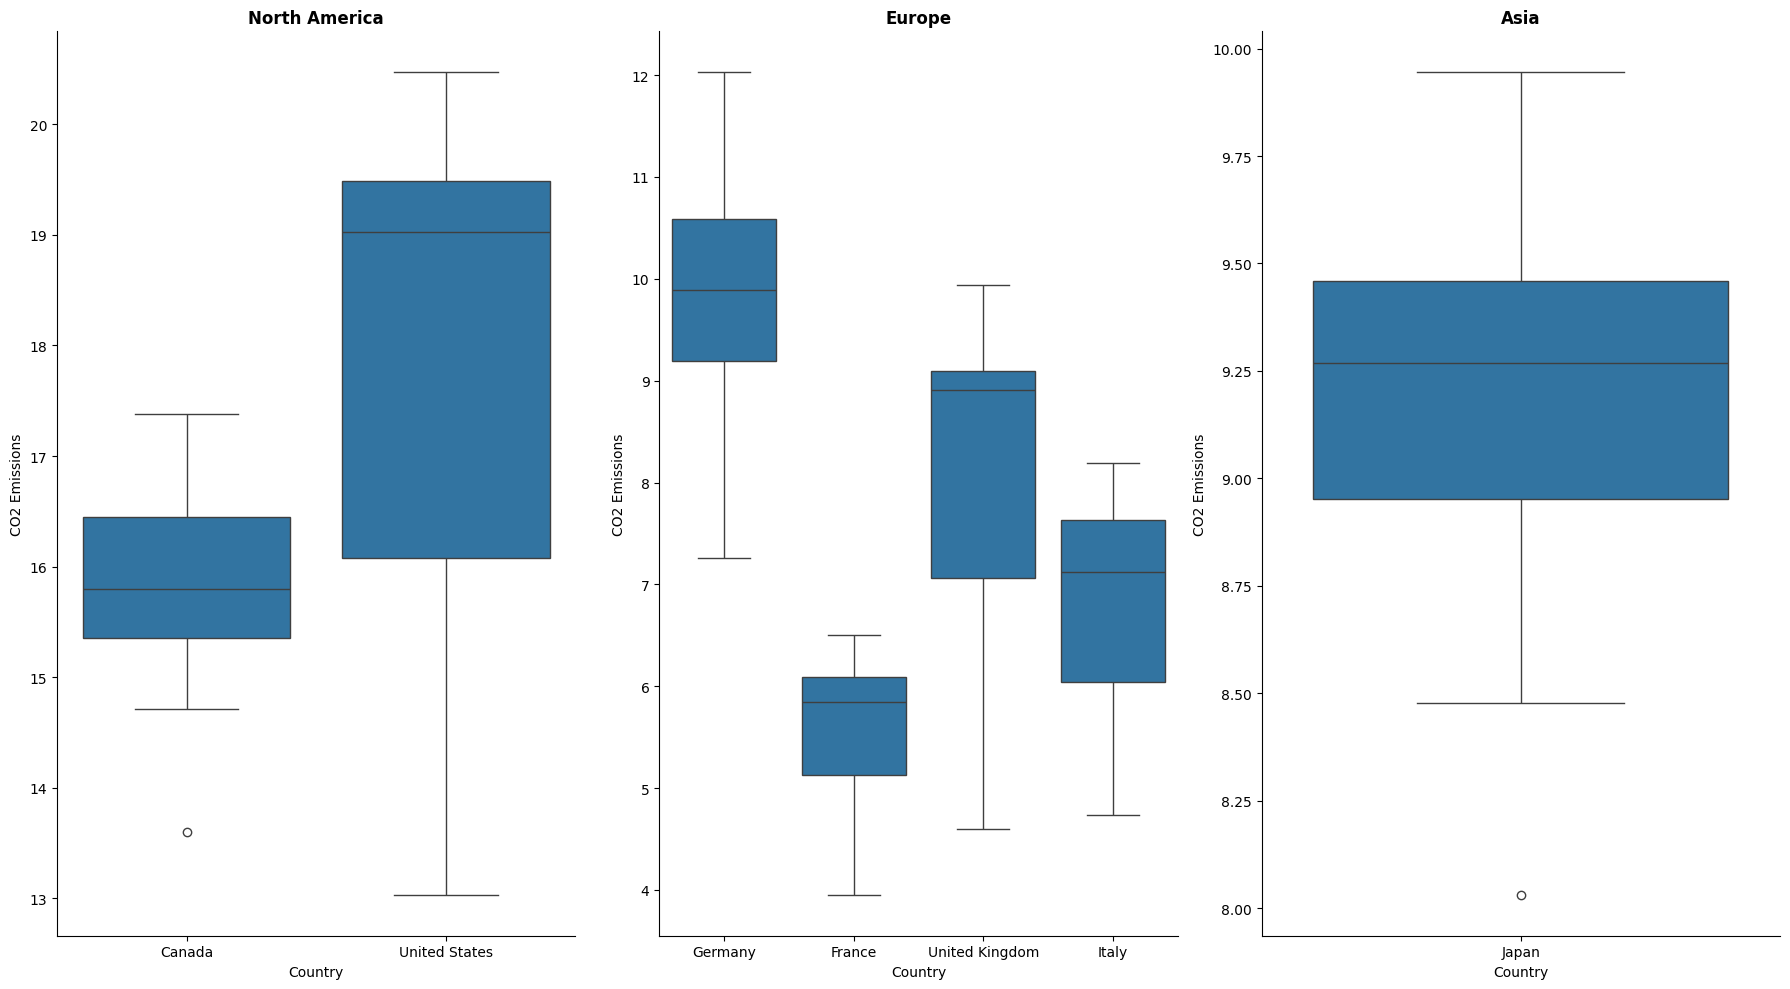

In [136]:
fig, ax = plt.subplots(1, 3, figsize=(18, 10))

sns.boxplot(
    data=df_north_america,
    x='Country',
    y='CO2 Emissions',
    ax=ax[0]
)
ax[0].set_title('North America', fontweight='bold')

sns.boxplot(
    data=df_europe,
    x='Country',
    y='CO2 Emissions',
    ax=ax[1]
)
ax[1].set_title('Europe', fontweight='bold')

sns.boxplot(
    data=df_asia,
    x='Country',
    y='CO2 Emissions',
    ax=ax[2]
)
ax[2].set_title('Asia', fontweight='bold')


sns.despine()
#plt.title('Median CO2 And Green Gas Emissions in G7', fontweight='bold')
plt.tight_layout()
plt.show()